<a href="https://colab.research.google.com/github/nxthuan512/Reinforcement-Learning-An-Introduction/blob/master/Chapter_2_Multi_armed_Bandits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction

This notebook shows the codes of the action-value methods described in the **Reinforcement Learning - An Introduction** *(Sutton and Barton March 2018)* textbook. The following codes are adjusted based on the **Artificial Intelligence: Reinforcement Learning in Python** course *(Lazy Programmer)*. 


---


**References**:
1.   [Reinforcement Learning - An Introduction](https://github.com/t0nberryking/Reinforcement-Learning) textbook
2.   [Artificial Intelligence: Reinforcement Learning in Python](https://www.udemy.com/artificial-intelligence-reinforcement-learning-in-python) course
3.   [The Multi-Armed Bandit Problem and Its Solutions](https://lilianweng.github.io/lil-log/2018/01/23/the-multi-armed-bandit-problem-and-its-solutions.html)

#A Multi-armed Bandit Problem
Consider the following learning problem. You are faced repeatedly with a choice among *multiple* different options, or actions. After each choice you receive a numerical reward chosen from a stationary probability distribution that depends on the action you selected. Your objective is to maximize the expected total reward over some time period, for example, over 1000 action selections, or *time steps*. (**Ref. 1**, Chapter 2.1, pp. 45/548)

# Action-Value Methods

In [0]:
from __future__ import print_function, division
from builtins import range
from collections import Counter
import numpy as np
import time as tm
import matplotlib.pyplot as plt

## 0. Bandit class

In [0]:
class Bandit:
    def __init__(self, n_bandits):
        self.n_bandits = n_bandits  # Number of bandits
        np.random.seed(int(tm.time()))
        self.probas = [np.random.random() for _ in range(self.n_bandits)] # Probability of getting reward of each bandit|

## 1. Epsilon-Greedy
**Ref. 1**, Chapter 2.4, pp. 51/548 \\
**Ref. 2**, Section 2.7

Probability of all bandits [0.9888266760917274, 0.6203734705015647, 0.7498128325118407]
Cummulative reward


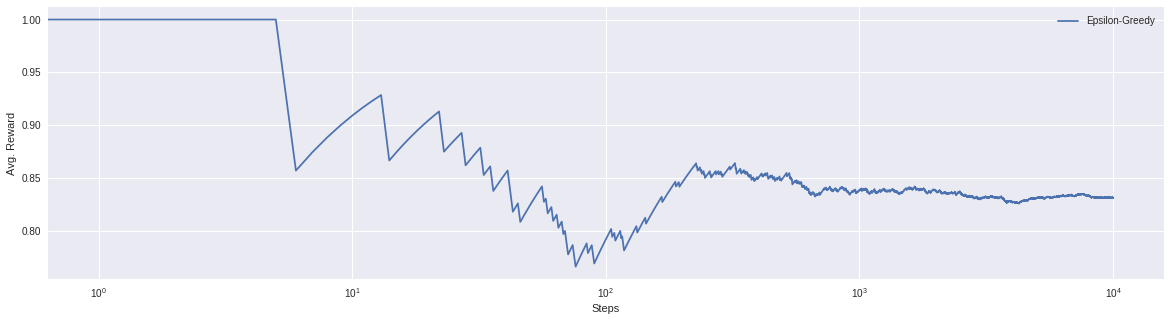

Done


In [4]:
# =====================================================
# Class algorithm
# =====================================================
class EpsGreedy:
    def __init__(self):
        self.mean   = 0
        self.step   = 0   
    
    # Generate random value whenever pulling    
    def generate_reward(self, probas):
        reward = np.random.randn()
        if reward < probas:
            return 1
        else:
            return 0
    
    # Update the mean
    def update(self, reward):
        self.step += 1
        self.mean = (1 - 1.0/self.step)*self.mean + (1.0/self.step)*reward
        
        
# =====================================================
# Run experiment
# =====================================================
def run_EpsGreedy(n_bandits, n_steps, probas, eps):    
    bandits_list = []  # list of all bandits
    bandits_lsel = []  # list of selected bandits
    rewards = []
    
    for j in range (0, n_bandits):
        bandits_list.append(EpsGreedy()) 
           
    # Iteration
    for _ in range (n_steps):
        # Selects bandit j
        p = np.random.random()
        if p < eps:
            j = np.random.choice(n_bandits)
        else:
            j = np.argmax([b.mean for b in bandits_list])
        
        # Bandit j returns reward
        reward = bandits_list[j].generate_reward(probas[j])
        
        # Update
        bandits_list[j].update(reward)
        
        # Save the rewards and selected bandits
        rewards.append(reward)
        bandits_lsel.append(j)
    
    # Accumulate average reward
    cumm_reward = np.cumsum(rewards) / (np.arange(n_steps) + 1)
    
    return cumm_reward, bandits_lsel

  
# =====================================================
# Main function
# =====================================================
if __name__ == '__main__':
    n_bandits = 3
    n_steps = 10000
    n_algorithms = ['Epsilon-Greedy', \
                    'Optimistic Initial Values', \
                    'Upper Confidence Bound', \
                    'Thompson Sampling']
    bandits_conf = Bandit(n_bandits)
    print("Probability of all bandits", bandits_conf.probas)
    
    plt.figure(figsize=(20, 5))
    plt.xlabel('Steps')
    plt.ylabel('Avg. Reward')
    
    ts_reward0, ts_bsel0  = run_EpsGreedy(n_bandits, n_steps, bandits_conf.probas, eps=0.1)
    
    # log scale plot
    print('Cummulative reward')
    plt.plot(ts_reward0, label=n_algorithms[0])

    plt.legend()
    plt.xscale('log')
    plt.show()
    
    print('Done')

## 2.  Optimistic Initial Value
**Ref. 1**, Chapter 2.6, pp. 54/548 \\
**Ref. 2**, Section 2.10

Probability of all bandits [0.5450622826506558, 0.5074114554910255, 0.7217761974443936]
Cummulative reward


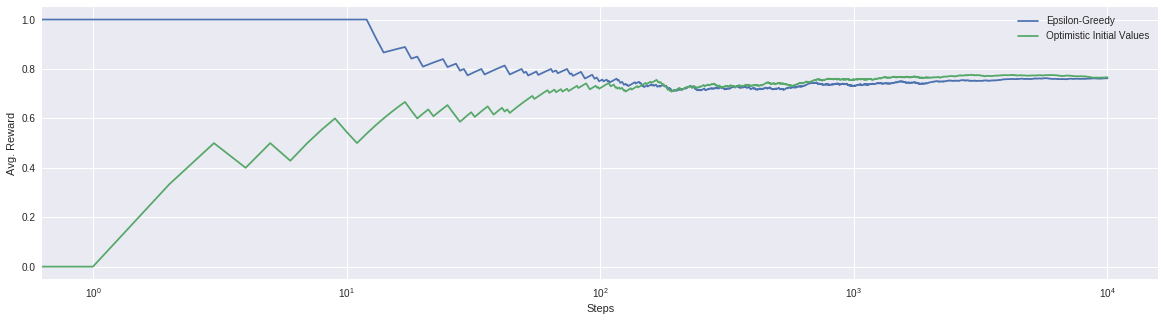

Done


In [5]:
# =====================================================
# Class algorithm
# =====================================================
class OptInitVal:
    def __init__(self, upper_limit):
        self.mean = upper_limit   
        self.step = 0               
    
    # Generate random value whenever pulling       
    def generate_reward(self, probas):
        reward = np.random.randn()
        if reward < probas:
            return 1
        else:
            return 0
    
    # Update the mean
    def update(self, reward):
        self.step += 1
        self.mean = (1 - 1.0/self.step)*self.mean + (1.0/self.step)*reward
 
        
# =====================================================
# Run experiment
# =====================================================
def run_OptInitVal(n_bandits, n_steps, probas, upper_limit):    
    bandits_list = []  # list of all bandits
    bandits_lsel = []  # list of selected bandits
    rewards = []
    
    for j in range (0, n_bandits):
        bandits_list.append(OptInitVal(upper_limit)) 
           
    # Iteration
    for _ in range (n_steps):
        # Selects bandit j
        j = np.argmax([b.mean for b in bandits_list])
        
        # Bandit j returns reward
        reward = bandits_list[j].generate_reward(probas[j])
        
        # Update
        bandits_list[j].update(reward)
        
        # Save the rewards and selected bandits
        rewards.append(reward)
        bandits_lsel.append(j)
    
    # Accumulate average reward
    cumm_reward = np.cumsum(rewards) / (np.arange(n_steps) + 1)
    
    return cumm_reward, bandits_lsel


# =====================================================
# Main function
# =====================================================
if __name__ == '__main__':
    n_bandits = 3
    n_steps = 10000
    n_algorithms = ['Epsilon-Greedy', \
                    'Optimistic Initial Values', \
                    'Upper Confidence Bound', \
                    'Thompson Sampling']
    bandits_conf = Bandit(n_bandits)
    print("Probability of all bandits", bandits_conf.probas)
    
    plt.figure(figsize=(20, 5))
    plt.xlabel('Steps')
    plt.ylabel('Avg. Reward')
    
    ts_reward0, ts_bsel0  = run_EpsGreedy(n_bandits, n_steps, bandits_conf.probas, eps=0.1)
    ts_reward1, ts_bsel1  = run_OptInitVal(n_bandits, n_steps, bandits_conf.probas, upper_limit=5)
    
    # log scale plot
    print('Cummulative reward')
    plt.plot(ts_reward0, label=n_algorithms[0])
    plt.plot(ts_reward1, label=n_algorithms[1])

    plt.legend()
    plt.xscale('log')
    plt.show()
    
    print('Done')

## 3. Upper Confidence Bound
**Ref. 1**, Chapter 2.7, pp. 55/548 \\
**Ref. 2**, Section 2.15

Probability of all bandits [0.8760113235507908, 0.7688329874343836, 0.01666738665467038]
Cummulative reward


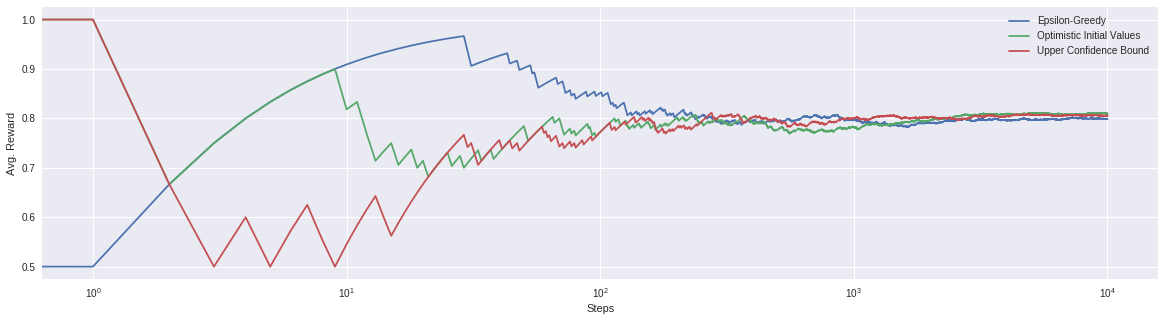

Done


In [6]:
# =====================================================
# Class algorithm
# =====================================================
class UpperConfidenceBound:
    def __init__(self):
        self.mean   = 0
        self.step   = 0
    
    # Generate random value whenever pulling    
    def generate_reward(self, probas):
        reward = np.random.randn()
        if reward < probas:
            return 1
        else:
            return 0
    
    # Update the mean
    def update(self, reward):
        self.step += 1
        self.mean = (1 - 1.0/self.step)*self.mean + (1.0/self.step)*reward
   
    # UCB action selection    
    def ucb_func(self, iteration):
        if self.step == 0:
            return float('inf')
        return self.mean + np.sqrt(2*np.log(iteration) / self.step)

  
# =====================================================
# Run experiment
# =====================================================
def run_UCB(n_bandits, n_steps, probas):
    bandits_list = []  # list of all bandits
    bandits_lsel = []  # list of selected bandits
    rewards = []
    
    for j in range (0, n_bandits):
        bandits_list.append(UpperConfidenceBound()) 
    
    for i in range (n_steps):
        # Agency selects action based on UCB
        j = np.argmax([b.ucb_func(i+1) for b in bandits_list])
        
        # Bandit j returns reward
        reward = bandits_list[j].generate_reward(probas[j])
        
        # Update
        bandits_list[j].update(reward)
        
        # Save the rewards and selected bandits
        rewards.append(reward)
        bandits_lsel.append(j)
    
    # Accumulate average reward
    cumm_reward = np.cumsum(rewards) / (np.arange(n_steps) + 1)

    return cumm_reward, bandits_lsel
  
  
# =====================================================
# Main function
# =====================================================
if __name__ == '__main__':
    n_bandits = 3
    n_steps = 10000
    n_algorithms = ['Epsilon-Greedy', \
                    'Optimistic Initial Values', \
                    'Upper Confidence Bound', \
                    'Thompson Sampling']
    bandits_conf = Bandit(n_bandits)
    print("Probability of all bandits", bandits_conf.probas)
    
    plt.figure(figsize=(20, 5))
    plt.xlabel('Steps')
    plt.ylabel('Avg. Reward')
    
    ts_reward0, ts_bsel0  = run_EpsGreedy(n_bandits, n_steps, bandits_conf.probas, eps=0.1)
    ts_reward1, ts_bsel1  = run_OptInitVal(n_bandits, n_steps, bandits_conf.probas, upper_limit=5)
    ts_reward2, ts_bsel2  = run_UCB(n_bandits, n_steps, bandits_conf.probas)
    
    # log scale plot
    print('Cummulative reward')
    plt.plot(ts_reward0, label=n_algorithms[0])
    plt.plot(ts_reward1, label=n_algorithms[1])
    plt.plot(ts_reward2, label=n_algorithms[2])

    plt.legend()
    plt.xscale('log')
    plt.show()
    
    print('Done')

## 4. Thompson Sampling 
**Ref. 2**, Section 2.16 \\
**Ref. 3**

Probability of all bandits [0.34496747842176567, 0.16008762495423834, 0.48619001848783705]
Cummulative reward


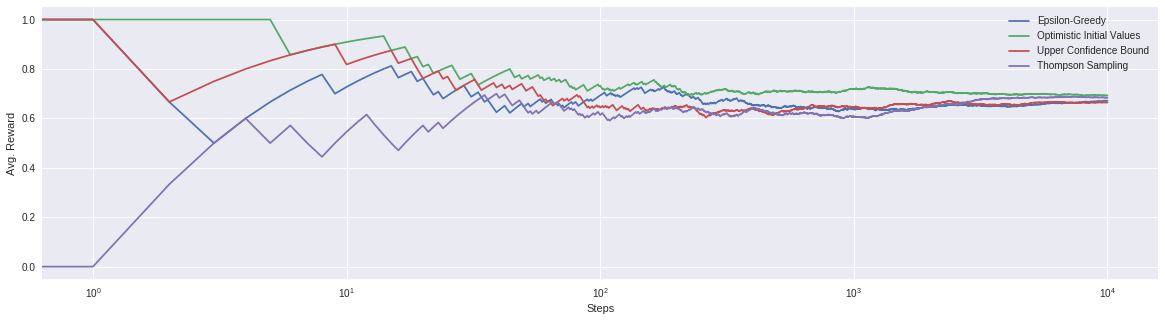

Done


In [7]:
# =====================================================
# Class algorithm
# =====================================================
class ThompsonSampling:
    def __init__(self):
        # parameters for mu - prior is N(0,1)
        self.mean   = 0
        self.step   = 0   # iteration
        self.alpha_ = 1
        self.beta_  = 1
    
    # Generate random value whenever pulling    
    def generate_reward(self, probas):
        reward = np.random.randn()
        if reward < probas:
            return 1
        else:
            return 0
    
    # Update the mean
    def update(self, reward):
        self.step += 1
        self.mean = (1 - 1.0/self.step)*self.mean + (1.0/self.step)*reward
        
        self.alpha_ += reward
        self.beta_ += (1 - reward)
    
    #
    def sample(self):
        return np.random.beta(self.alpha_, self.beta_)

  
# =====================================================
# Run experiment
# =====================================================
def run_ThompsonSampling(n_bandits, n_steps, probas):    
    bandits_list = []  # list of all bandits
    bandits_lsel = []  # list of selected bandits
    rewards = []
    
    for j in range (0, n_bandits):
        bandits_list.append(ThompsonSampling()) 
           
    # Iteration
    for _ in range (n_steps):
        # Selects bandit j
        j = np.argmax([b.sample() for b in bandits_list])
        
        # Bandit j returns reward
        reward = bandits_list[j].generate_reward(probas[j])
        
        # Update
        bandits_list[j].update(reward)
        
        # Save the rewards and selected bandits
        rewards.append(reward)
        bandits_lsel.append(j)
    
    # Accumulate average reward
    cumm_reward = np.cumsum(rewards) / (np.arange(n_steps) + 1)
    
    return cumm_reward, bandits_lsel
  
  
# =====================================================
# Main function
# =====================================================
if __name__ == '__main__':
    n_bandits = 3
    n_steps = 10000
    n_algorithms = ['Epsilon-Greedy', \
                    'Optimistic Initial Values', \
                    'Upper Confidence Bound', \
                    'Thompson Sampling']
    bandits_conf = Bandit(n_bandits)
    print("Probability of all bandits", bandits_conf.probas)
    
    plt.figure(figsize=(20, 5))
    plt.xlabel('Steps')
    plt.ylabel('Avg. Reward')
    
    ts_reward0, ts_bsel0  = run_EpsGreedy(n_bandits, n_steps, bandits_conf.probas, eps=0.1)
    ts_reward1, ts_bsel1  = run_OptInitVal(n_bandits, n_steps, bandits_conf.probas, upper_limit=5)
    ts_reward2, ts_bsel2  = run_UCB(n_bandits, n_steps, bandits_conf.probas)
    ts_reward3, ts_bsel3  = run_ThompsonSampling(n_bandits, n_steps, bandits_conf.probas)
    
    # log scale plot
    print('Cummulative reward')
    plt.plot(ts_reward0, label=n_algorithms[0])
    plt.plot(ts_reward1, label=n_algorithms[1])
    plt.plot(ts_reward2, label=n_algorithms[2])
    plt.plot(ts_reward3, label=n_algorithms[3])

    plt.legend()
    plt.xscale('log')
    plt.show()
    
    print('Done')